In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math 

In [8]:
m1 = 0.1
m2 = 0.75
V0 = 20
R = 0.3
vf = 2.353
g = 0
n = 1000

In [9]:
#Funzioni Lineari a e b
Ft = np.linspace(0, 2, 1000)

def V1x(x):
    return V0 - x/m1
V1x = V1x(Ft)

def v2(x):
    return x/m2
V2 = v2(Ft)


#Funzioni d e d'
def V2x(x, y):
    return y*np.cos(x)        #Continua dopo perchè mi servono teta e V2 dall'eq. diff


#Runge-Kutta per c e c'
def f(x,v,F) :
    return (((F*np.cos(x))/(m2+(m1*(np.sin(x))**2)))-((m1*(v**2)*(np.sin(x))**2)/(2*R*(m2+(m1*(np.sin(x)**2)))))-(((m1+m2)*g*np.sin(x))/(m2+(m1*(np.sin(x))**2))))

def f_2(x,csi,F):
    return f(x, R*F*csi, F)/((F**2)*R)

def f_3(x,csi,F):
    return f(x, R*csi, F)/R


x0 = 0
csi0 = 0
t0 = 0
F = 6
def RK4(F, func, fine):
    h = fine/n
    t = t0
    x = x0
    csi = csi0
    T = np.zeros(n)
    X = np.zeros(n)
    V = np.zeros(n)
    for i in range (n):
        T[i] = t
        X[i] = x
        if func == f_2:
            V[i] = R * F * csi
        elif func == f_3:
            V[i] = R * csi

        K1 = h*csi
        M1 = h*func(x,csi, F)

        K2 = h*(csi+M1/2)
        M2 = h*func(x+(K1/2), csi+(M1/2), F)

        K3 = h*(csi+(M2/2))
        M3 = h*func(x+(K2/2), csi+(M2/2), F)

        K4 = h*(csi+(M3/2))
        M4 = h*func(x+K3, csi+M3, F)

        x += (K1/6)+(K2/3)+(K3/3)+(K4/6)
        csi += (M1/6)+(M2/3)+(M3/3)+(M4/6)
        t = t+h
        
    M = np.array((T, X, V))
    return M                  #M è una matrice con 3 righe ed n colonne. La prima riga è quella del tempo, la seconda riga è quella di teta e la terza riga è V (Tutto in funzione di Ft grazie alla trasformazione di coordinate)


#Possiamo scrivere d e d'
GA = RK4(6, f_2, 2)   #d'
V2x_6 = np.zeros(n)
for i in range(n):
    V2x_6[i] = V2x(GA[1, i], GA[2, i])

GB = RK4(22, f_2, 2)  #d
V2x_22 = np.zeros(n)
for i in range(n):
    V2x_22[i] = V2x(GB[1, i], GB[2, i])


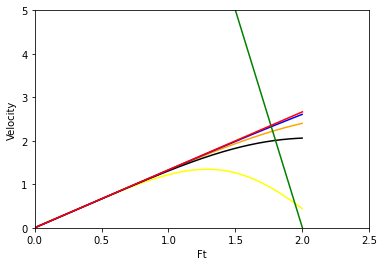

In [10]:
#Plottiamo tutte e 6 le Curve
plt.plot(GA[0], V2x_6, color="yellow")            #d'
plt.plot(GB[0], V2x_22, color="orange")           #d

plt.plot(GA[0], GA[2], color="black")             #c'
plt.plot(GB[0], GB[2], color="blue")              #c

plt.plot(Ft, V1x, color="green")                  #a
plt.plot(Ft, V2, color="red")                     #b

plt.xlabel("Ft")
plt.ylabel("Velocity")
plt.xlim(0, 2.5)
plt.ylim(0, 5)
plt.show()


In [11]:
FF = np.array((5, 6, 7, 8, 10, 12, 15, 18, 21, 25))

G1 = RK4(5, f_2, 2)  #d
V2x_5 = np.zeros(n)
for i in range(n):
    V2x_5[i] = V2x(G1[1, i], G1[2, i])
    
    
G2 = RK4(6, f_2, 2)  #d
V2x_6 = np.zeros(n)
for i in range(n):
    V2x_6[i] = V2x(G2[1, i], G2[2, i])
    

    
G3 = RK4(7, f_2, 2)  #d
V2x_7 = np.zeros(n)
for i in range(n):
    V2x_7[i] = V2x(G3[1, i], G3[2, i])
    
G4 = RK4(8, f_2, 2)  #d
V2x_8 = np.zeros(n)
for i in range(n):
    V2x_8[i] = V2x(G4[1, i], G4[2, i])
    
    
G5 = RK4(10, f_2, 2)  #d
V2x_10 = np.zeros(n)
for i in range(n):
    V2x_10[i] = V2x(G5[1, i], G5[2, i])  
    
    
G6 = RK4(12, f_2, 2)  #d
V2x_12 = np.zeros(n)
for i in range(n):
    V2x_12[i] = V2x(G6[1, i], G6[2, i])
    
    
    
G7 = RK4(15, f_2, 2)  #d
V2x_15 = np.zeros(n)
for i in range(n):
    V2x_15[i] = V2x(G7[1, i], G7[2, i])

G8 = RK4(18, f_2, 2)  #d
V2x_18 = np.zeros(n)
for i in range(n):
    V2x_18[i] = V2x(G8[1, i], G8[2, i])
    

G9 = RK4(21, f_2, 2)  #d
V2x_21 = np.zeros(n)
for i in range(n):
    V2x_21[i] = V2x(G9[1, i], G9[2, i])
    
    
G10 = RK4(25, f_2, 2)  #d
V2x_25 = np.zeros(n)
for i in range(n):
    V2x_25[i] = V2x(G10[1, i], G10[2, i])

print(len(FF))

10


In [14]:
G=np.array(( G1, G2, G3, G4, G5, G6, G7, G8, G9, G10))
V = np.array((V2x_5, V2x_6, V2x_7, V2x_8, V2x_10, V2x_12, V2x_15, V2x_18, V2x_21, V2x_25))


VA=np.zeros(10)
VB=np.zeros(10)
VT= np.zeros(10)
for l in range (10):
    Vx=[]
    Vy=[]
    Vth = []
    e=0.01
    for m in range (n):
        for c in range (n):
            if (abs(Ft[m]-G[l,0,c]))<=e:
                if (abs(V1x[m]-V[l,c]))<=e:
                    Vx = np.append(Vx, G[l,0,c])
                    Vy = np.append(Vy, V[l,c])
                    Vth = np.append(Vx, G[l,1,c])
            
    VA[l] = Vx[0]
    VB[l] = Vy[0]
    VT[l] = Vth[0]

                
                
                
                
                
print (VA, VB, VT)


[1.988 1.93  1.888 1.856 1.82  1.8   1.784 1.78  1.784 1.776] [0.0182644  0.59373872 1.02624531 1.33406112 1.70186679 1.90164137
 2.06298672 2.15283671 2.21327635 2.25296493] [1.988 1.93  1.888 1.856 1.82  1.8   1.784 1.78  1.784 1.776]


In [15]:
VELOCITA = np.zeros(len(FF))
THETA = np.zeros(len(FF))
grad = 57.2958
for s in range(len(FF)):
    VELOCITA[s] = VB[s]
    THETA [s] = VT[s]*grad

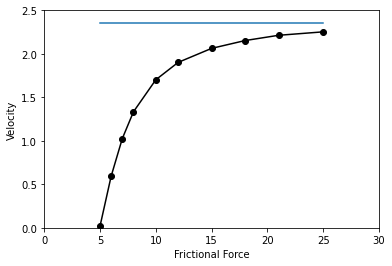

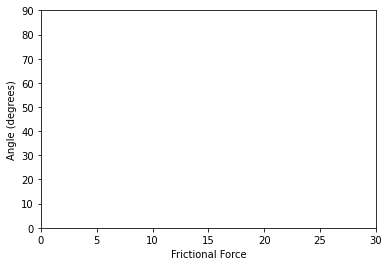

In [16]:
C = np.ones(len(FF))*2.355
plt.plot(FF, VELOCITA, color="black", marker="o")
plt.plot(FF, C, linestyle='-')
plt.ylim(0, 2.5)
plt.xlim(0, 30)
plt.xlabel("Frictional Force")
plt.ylabel("Velocity")
plt.show()

grad = 57.2958
plt.plot(FF, THETA, color="red", marker="o")
plt.xlabel("Frictional Force")
plt.ylabel("Angle (degrees)")
plt.ylim(0, 90)
plt.xlim(0, 30)
plt.show()